# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

# Data Loading

In [3]:
df = pd.read_csv('bank-additional-full.csv', sep=';')
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [4]:
df.tail()

age          job  marital            education default housing loan  \
41183   73      retired  married  professional.course      no     yes   no   
41184   46  blue-collar  married  professional.course      no      no   no   
41185   56      retired  married    university.degree      no     yes   no   
41186   44   technician  married  professional.course      no      no   no   
41187   74      retired  married  professional.course      no     yes   no   

        contact month day_of_week  ...  campaign  pdays  previous  \
41183  cellular   nov         fri  ...         1    999         0   
41184  cellular   nov         fri  ...         1    999         0   
41185  cellular   nov         fri  ...         2    999         0   
41186  cellular   nov         fri  ...         1    999         0   
41187  cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
41183  nonexistent         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

       nr.employed    y  
41183       4963.6  yes  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  
41187       4963.6   no  

[5 rows x 21 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df.shape

(41188, 21)

# Data Cleansing

In [7]:
# Memeriksa missing value
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Tidak ada missing value

In [8]:
# Memeriksa duplikasi pada dataset
df.duplicated().sum()

12

Terdapat 12 data yang duplikat. Sehingga kita harus menghapusnya.

In [9]:
# Menghpaus duplikasi data
df = df.drop_duplicates()

# Data Exploration

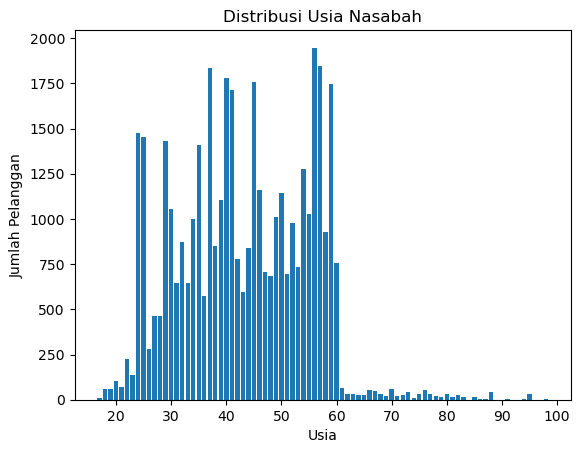

In [10]:
age = df["age"]

plt.bar(age.unique(), age.value_counts())

# Tambahkan judul dan label
plt.title("Distribusi Usia Nasabah")
plt.xlabel("Usia")
plt.ylabel("Jumlah Pelanggan")

# Tampilkan plot
plt.show()

Berdasarkan bar plot di atas dapat diperoleh informasi sebagai berikut :
1. Jumlah nasabah terbanyak adalah nasabah yang berusia 30-50 tahun. Usia tersebut adalah usia produktif, sehingga memungkinkan untuk memiliki pendapatan yang stabil dan memiliki kebutuhan menabung untuk usia pensiun.
2. Nasabah yang berusia di bawah 30 tahun juga merupakan kelompok nasabah yang signifikan. Usia tersebut adalah awal-awal merintis karir, sehingga memungkinkan untuk memulai menabung untuk masa depan.
3. Jumlah nasabah yang berusia 60 tahun ke atas ialah yang paling sedikit. Ini mungkin karena kelompok ini sudah memiliki pensiun atau sumber pendapatan lain.

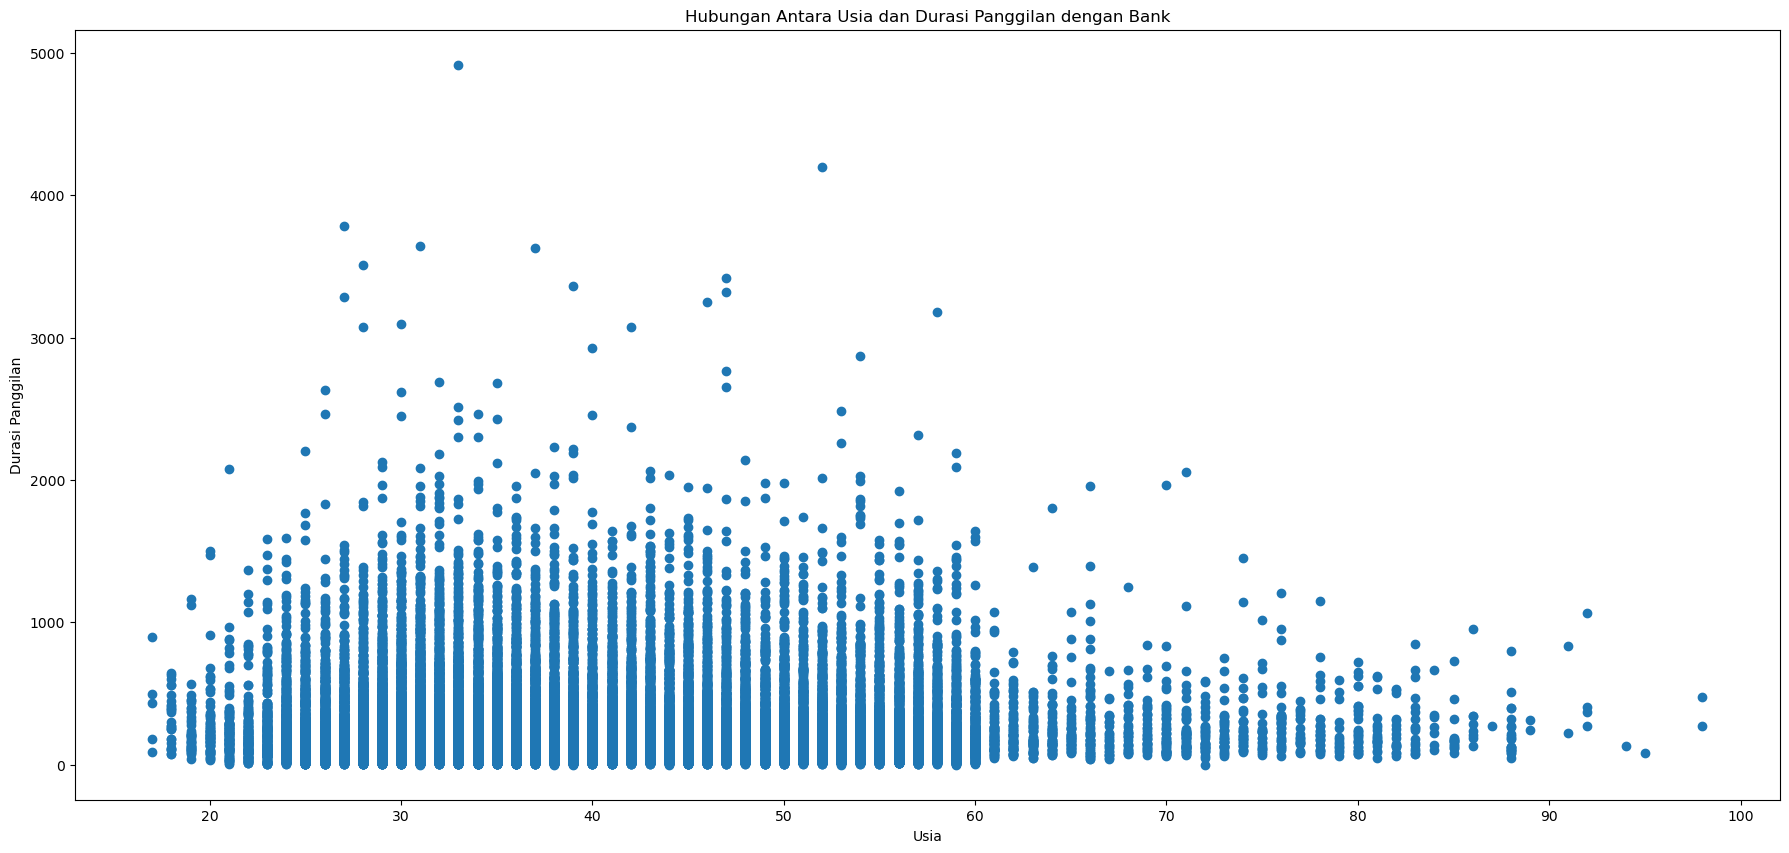

In [11]:
# Visualisasi data dengan scatter plot
age = df['age']
duration = df['duration']

plt.figure(figsize=(22,10))
plt.scatter(age, duration)
plt.title("Hubungan Antara Usia dan Durasi Panggilan dengan Bank")
plt.xlabel("Usia")
plt.ylabel("Durasi Panggilan")
plt.show()

Kesimpulan yang dapat diambil dari grafik ini:
1. Nasabah yang lebih tua cenderung memiliki durasi panggilan yang lebih panjang dengan bank.
2. Nasabah muda mungkin memiliki durasi panggilan yang lebih panjang dengan bank karena mereka baru mengenal produk dan layanan bank atau karena mereka memiliki kebutuhan finansial yang spesifik.
3. Usia pelanggan merupakan salah satu faktor yang dapat mempengaruhi durasi panggilan dengan bank, tetapi terdapat faktor-faktor lain yang juga dapat mempengaruhi durasi panggilan, seperti kebutuhan finansial pelanggan dan pengalaman pelanggan dengan produk dan layanan bank.

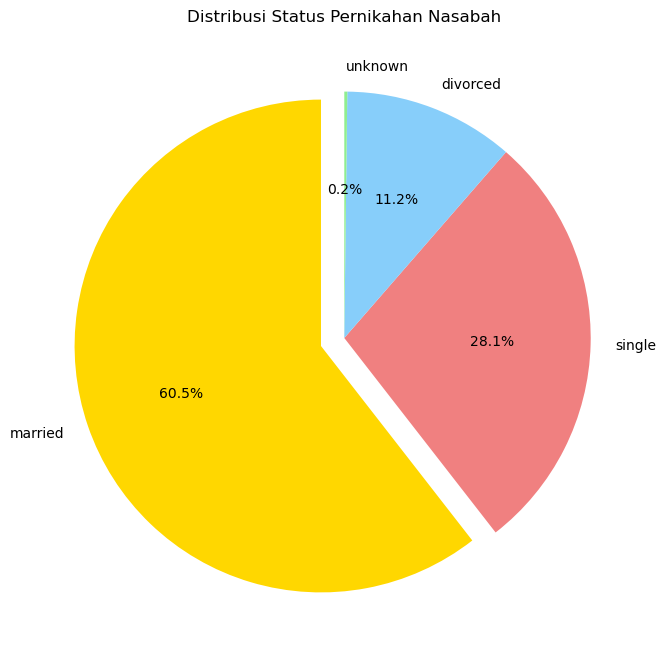

In [12]:
# Hitung jumlah masing-masing nilai pada kolom 'marital'
marital_counts = df['marital'].value_counts()

# Menyesuaikan warna dan eksploded slice
colors = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen']
explode = (0.1, 0, 0, 0)

# Buat pie chart
plt.figure(figsize=(8, 8))
plt.pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)

# Tambahkan judul
plt.title('Distribusi Status Pernikahan Nasabah')

# Tampilkan pie chart
plt.show()

Pie chart ini menunjukan bahwa sebagian besar nasabah telah menikah (60.5%). Ada juga nasabah yang masih lajang sebanyak 28.1%, nasabah yang bercerai 11.2%, dan nasabah yang tidak diketahu status pernikahannya adalah sebanyak 0.2%

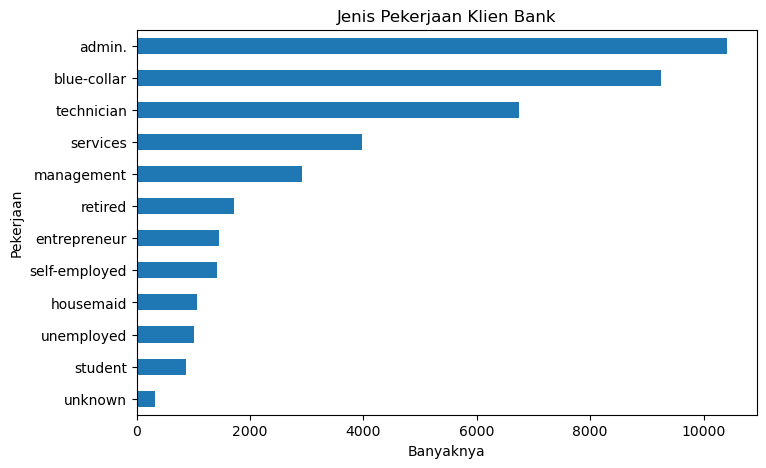

In [13]:
# Visualisasi data dengan lineplot

df['job'].value_counts().sort_values().plot(kind='barh', figsize=(8,5))

plt.title('Jenis Pekerjaan Klien Bank')
plt.xlabel("Banyaknya")
plt.ylabel("Pekerjaan")
plt.show()

Bar plot ini menunjukan nasabah yang bekerja sebagai admin adalah nasabah yang paling banyak. Kemudian disusul oleh blue-collar dan teknisi.

# Data Preprocessing

#### Encoding

In [14]:
label_encoder = preprocessing.LabelEncoder()
df_category = df.select_dtypes(include='object')
df_encode = df.copy()

for column in df_category.columns:
    df_encode[column]=label_encoder.fit_transform(df[column])

In [15]:
df_encode.head()

age  job  marital  education  default  housing  loan  contact  month  \
0   56    3        1          0        0        0     0        1      6   
1   57    7        1          3        1        0     0        1      6   
2   37    7        1          3        0        2     0        1      6   
3   40    0        1          1        0        0     0        1      6   
4   56    7        1          3        0        0     2        1      6   

   day_of_week  ...  campaign  pdays  previous  poutcome  emp.var.rate  \
0            1  ...         1    999         0         1           1.1   
1            1  ...         1    999         0         1           1.1   
2            1  ...         1    999         0         1           1.1   
3            1  ...         1    999         0         1           1.1   
4            1  ...         1    999         0         1           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0          93.994          -36.4      4.857       5191.0  0  
1          93.994          -36.4      4.857       5191.0  0  
2          93.994          -36.4      4.857       5191.0  0  
3          93.994          -36.4      4.857       5191.0  0  
4          93.994          -36.4      4.857       5191.0  0  

[5 rows x 21 columns]

#### Scaliing

In [16]:
# Melakukan Scalling pada Data Frame
scaler = preprocessing.StandardScaler()
scale_df = df_encode.copy()
numeric_df = df.select_dtypes(include=['int64','float64'])
for column in numeric_df.columns:
  scale_df[column] = scaler.fit_transform(df[column].values.reshape(-1,1))

In [17]:
scale_df.head()

age  job  marital  education  default  housing  loan  contact  month  \
0  1.533143    3        1          0        0        0     0        1      6   
1  1.629107    7        1          3        1        0     0        1      6   
2 -0.290177    7        1          3        0        2     0        1      6   
3 -0.002284    0        1          1        0        0     0        1      6   
4  1.533143    7        1          3        0        0     2        1      6   

   day_of_week  ...  campaign     pdays  previous  poutcome  emp.var.rate  \
0            1  ... -0.565963  0.195443 -0.349551         1      0.648101   
1            1  ... -0.565963  0.195443 -0.349551         1      0.648101   
2            1  ... -0.565963  0.195443 -0.349551         1      0.648101   
3            1  ... -0.565963  0.195443 -0.349551         1      0.648101   
4            1  ... -0.565963  0.195443 -0.349551         1      0.648101   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0        0.722628       0.886568   0.712463     0.331695  0  
1        0.722628       0.886568   0.712463     0.331695  0  
2        0.722628       0.886568   0.712463     0.331695  0  
3        0.722628       0.886568   0.712463     0.331695  0  
4        0.722628       0.886568   0.712463     0.331695  0  

[5 rows x 21 columns]

#### Memeriksa Relasi Antar Kolom

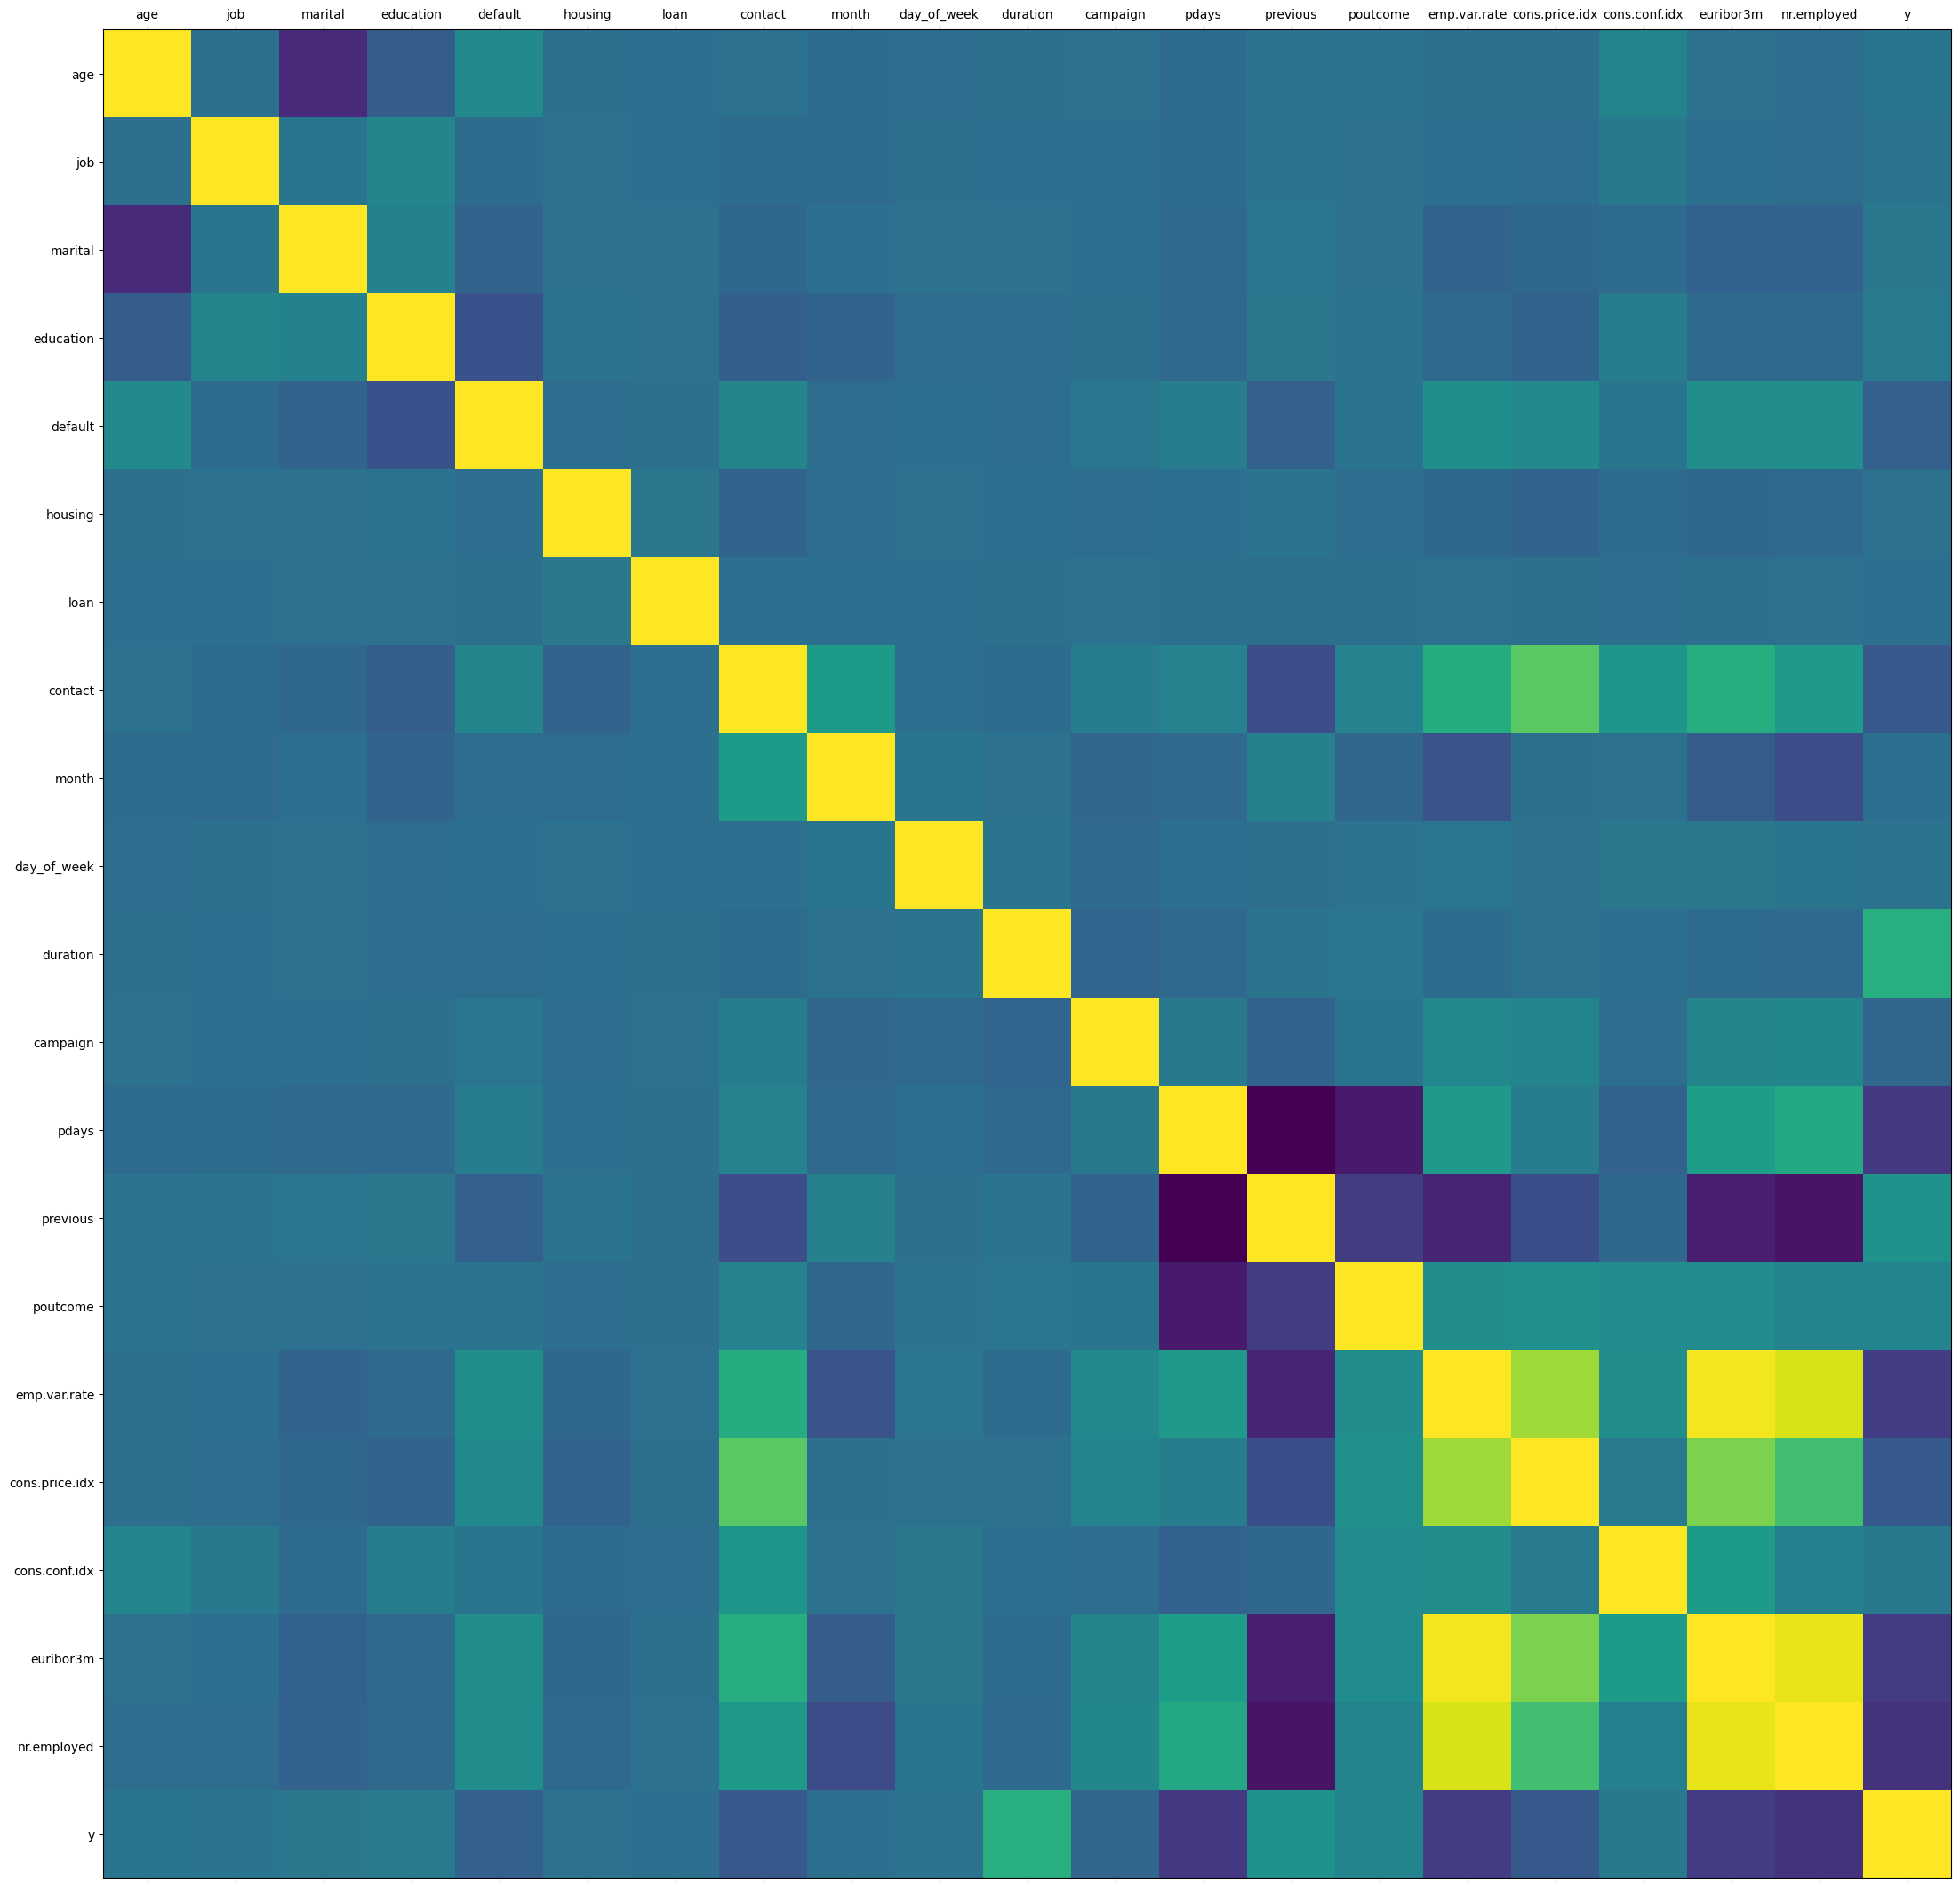

In [18]:
def plot_corr(df, size=27):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
# Membuat visualisasi Plot_corr
plot_corr(scale_df)

Kotak berwarna kuning adalah untuk kolom-kolom yang saling berelasi. Kotak kuning yang membentuk diagolan adalah hal yang normal. Namun, terdapat kotak kuning yang terletak di luar diagonal berarti terdapat data yang sama atau terjadi redundansi data dan dapat diperiksa menggunakan `scale_df.corr()`.

In [44]:
scale_df.corr()

age       job   marital  education   housing   contact  \
age            1.000000  0.001270 -0.389829  -0.117960 -0.001477  0.006917   
job            0.001270  1.000000  0.027829   0.134159  0.006873 -0.025054   
marital       -0.389829  0.027829  1.000000   0.109195  0.010499 -0.054527   
education     -0.117960  0.134159  0.109195   1.000000  0.016891 -0.105722   
housing       -0.001477  0.006873  0.010499   0.016891  1.000000 -0.082098   
contact        0.006917 -0.025054 -0.054527  -0.105722 -0.082098  1.000000   
day_of_week   -0.017614 -0.000868  0.002174  -0.017989  0.003339 -0.009614   
duration      -0.000808 -0.006408  0.010278  -0.015086 -0.007688 -0.026665   
pdays         -0.034381 -0.028494 -0.037955  -0.046656 -0.010539  0.117999   
previous       0.024379  0.021007  0.038708   0.038880  0.021293 -0.212903   
poutcome       0.019750  0.011485  0.001905   0.016987 -0.011771  0.118773   
emp.var.rate  -0.000242 -0.008443 -0.084142  -0.043695 -0.060248  0.393730   
cons.conf.idx  0.129075  0.052802 -0.033821   0.078789 -0.033665  0.251575   
y              0.030381  0.025248  0.046249   0.057776  0.011613 -0.144774   

               day_of_week  duration     pdays  previous  poutcome  \
age              -0.017614 -0.000808 -0.034381  0.024379  0.019750   
job              -0.000868 -0.006408 -0.028494  0.021007  0.011485   
marital           0.002174  0.010278 -0.037955  0.038708  0.001905   
education        -0.017989 -0.015086 -0.046656  0.038880  0.016987   
housing           0.003339 -0.007688 -0.010539  0.021293 -0.011771   
contact          -0.009614 -0.026665  0.117999 -0.212903  0.118773   
day_of_week       1.000000  0.021990 -0.009531 -0.004103  0.018733   
duration          0.021990  1.000000 -0.047556  0.020600  0.033385   
pdays            -0.009531 -0.047556  1.000000 -0.587508 -0.475635   
previous         -0.004103  0.020600 -0.587508  1.000000 -0.313098   
poutcome          0.018733  0.033385 -0.475635 -0.313098  1.000000   
emp.var.rate      0.033288 -0.027941  0.271063 -0.420587  0.193015   
cons.conf.idx     0.041405 -0.008126 -0.091374 -0.050929  0.178318   
y                 0.015970  0.405297 -0.324948  0.230202  0.129810   

               emp.var.rate  cons.conf.idx         y  
age               -0.000242       0.129075  0.030381  
job               -0.008443       0.052802  0.025248  
marital           -0.084142      -0.033821  0.046249  
education         -0.043695       0.078789  0.057776  
housing           -0.060248      -0.033665  0.011613  
contact            0.393730       0.251575 -0.144774  
day_of_week        0.033288       0.041405  0.015970  
duration          -0.027941      -0.008126  0.405297  
pdays              0.271063      -0.091374 -0.324948  
previous          -0.420587      -0.050929  0.230202  
poutcome           0.193015       0.178318  0.129810  
emp.var.rate       1.000000       0.196257 -0.298289  
cons.conf.idx      0.196257       1.000000  0.054802  
y                 -0.298289       0.054802  1.000000

In [20]:
# Menghapus beberapa kolom yang sedikit berelasi dengan kolom y dan kolom yang memiliki nilai data yang sama.
scale_df.drop(columns=['euribor3m', 'nr.employed', 'cons.price.idx', 'default', 'loan', 'month', 'campaign'], inplace=True)
scale_df.head()

age  job  marital  education  housing  contact  day_of_week  duration  \
0  1.533143    3        1          0        0        1            1  0.010352   
1  1.629107    7        1          3        0        1            1 -0.421577   
2 -0.290177    7        1          3        2        1            1 -0.124626   
3 -0.002284    0        1          1        0        1            1 -0.413864   
4  1.533143    7        1          3        0        1            1  0.187751   

      pdays  previous  poutcome  emp.var.rate  cons.conf.idx  y  
0  0.195443 -0.349551         1      0.648101       0.886568  0  
1  0.195443 -0.349551         1      0.648101       0.886568  0  
2  0.195443 -0.349551         1      0.648101       0.886568  0  
3  0.195443 -0.349551         1      0.648101       0.886568  0  
4  0.195443 -0.349551         1      0.648101       0.886568  0

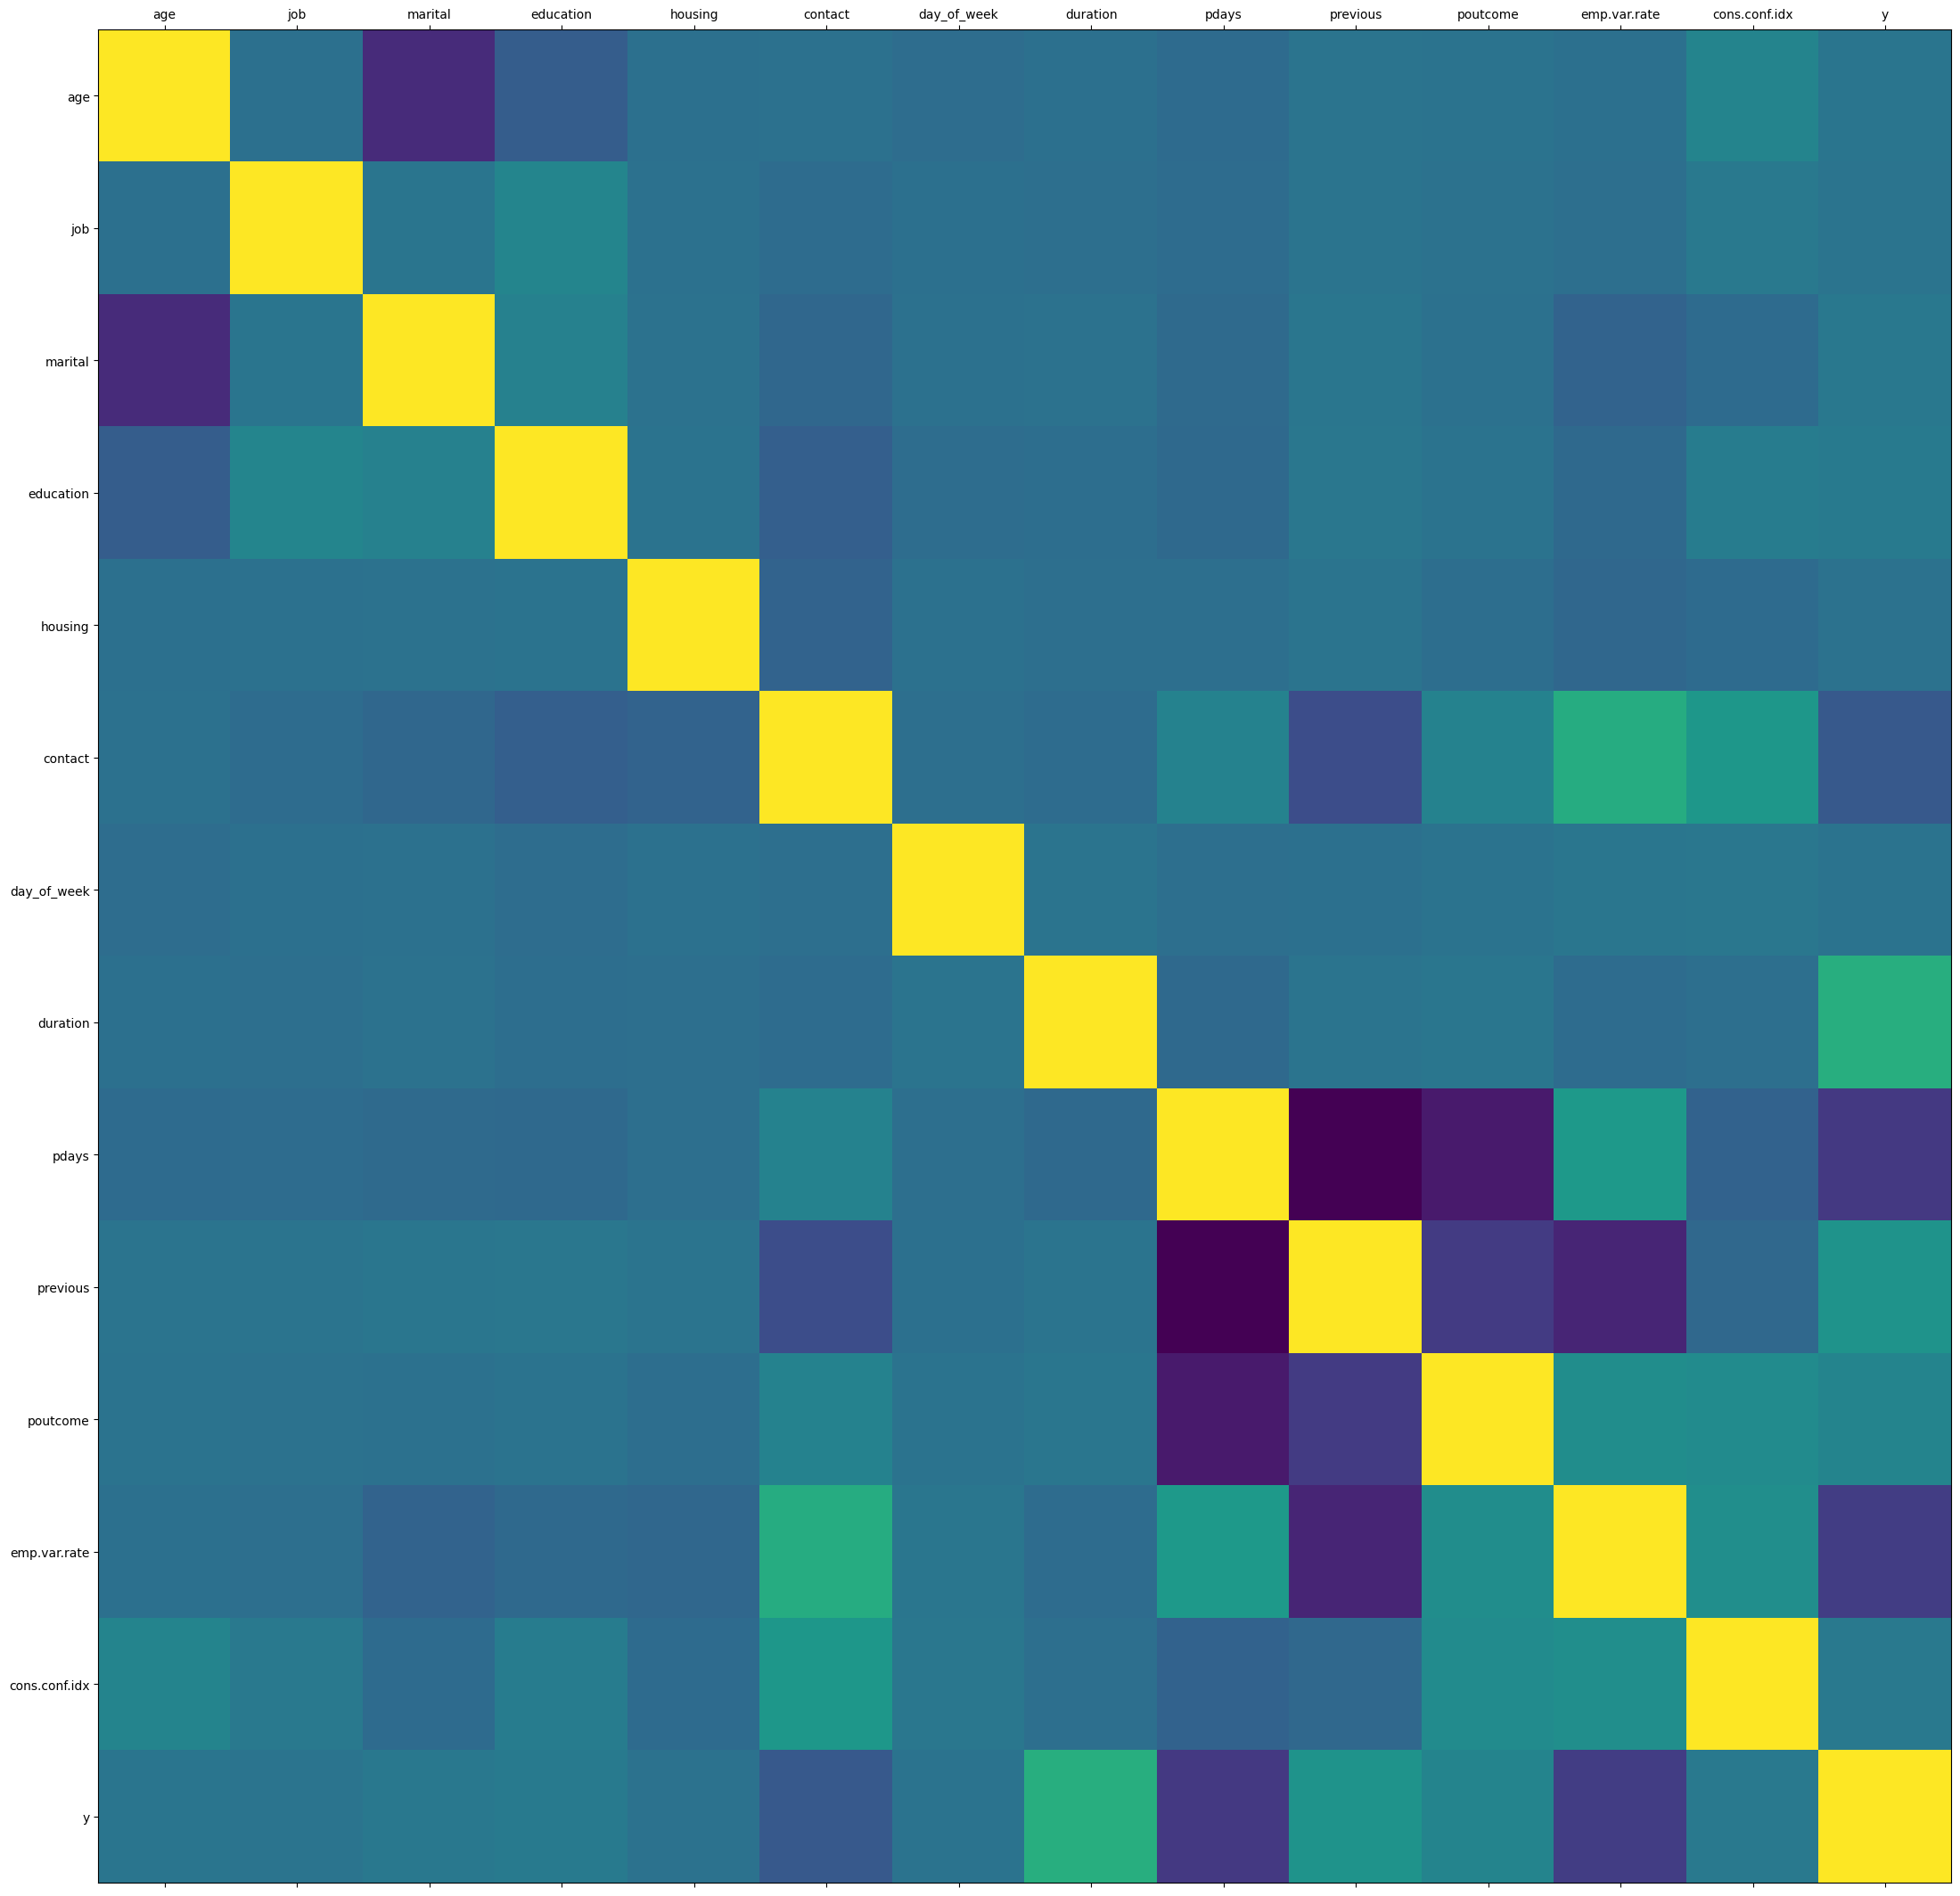

In [21]:
# Periksa ulang kolom relasi
plot_corr(scale_df)

# Data Training dan Data Testing

####  Membuat Training dan Testing Set

In [22]:
# Membuat Training dan Testing Set
X = scale_df.drop(columns=['y'])
y = scale_df.y
split_test_size = 0.30

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=split_test_size, random_state=13)

#### Logistic Regression

In [23]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [24]:
y_pred_lr = lr_model.predict(X_test)

In [25]:
lr_accuracy = accuracy_score(y_test, y_pred_lr)

#### K-Nearest Neighbors

In [26]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
y_pred_knn = knn_model.predict(X_test)

In [28]:
knn_accuracy = accuracy_score(y_test, y_pred_knn)

#### SVM

In [29]:
svm = svm.SVC()
svm.fit(X_train, y_train)

SVC()

In [30]:
y_pred_svm = svm.predict(X_test)

In [31]:
svm_accuracy = accuracy_score(y_test, y_pred_svm)

#### Decision Tree

In [32]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [33]:
y_pred_dt = dt.predict(X_test)

In [34]:
dt_accuracy = accuracy_score(y_test, y_pred_dt)


(process:14660): GLib-GIO-WARNING **: 14:31:46.857: Unexpectedly, UWP app `Microsoft.ScreenSketch_11.2309.16.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ScreenSketch_8wekyb3d8bbwe!App') supports 29 extensions but has no verbs

(process:14660): GLib-GIO-WARNING **: 14:31:47.205: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.8.3.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.29808 to fit



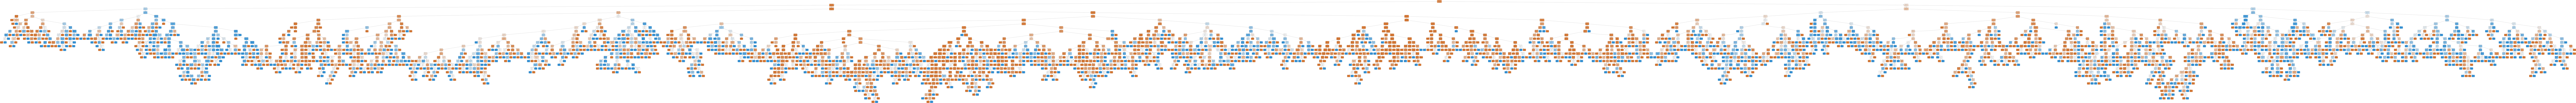

In [35]:
import sklearn.tree as tree
import pydotplus
from six import StringIO 
from IPython.display import Image

feature_cols = ['age', 'job', 'marital', 'education', 'housing', 'day_of_week', 'duration', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.conf.idx', 'y']

dot_data = StringIO()
tree.export_graphviz(dt, 
    out_file=dot_data, 
    class_names=['0','1'], # the target names.
    feature_names=feature_cols, # the feature names.
    filled=True, # Whether to fill in the boxes with colours.
    rounded=True, # Whether to round the corners of the boxes.
    special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

#### Random Forest

In [36]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [37]:
y_pred_rf = dt.predict(X_test)

In [38]:
rf_accuracy = accuracy_score(y_test, y_pred_rf)

#### Naive Bayes

In [39]:
nb=GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [40]:
y_pred_nb = dt.predict(X_test)

In [41]:
nb_accuracy = accuracy_score(y_test, y_pred_nb)

# Model Evaluation

### Logistic Regression

In [42]:
# Evaluasi model
accuracy = lr_model.score(X_test, y_test)
accuracy_train = lr_model.score(X_train, y_train)
print(f'Akurasi Model: {accuracy * 100:.2f}%')
print(f'Akurasi Model: {accuracy_train * 100:.2f}%')

Akurasi Model: 90.62%
Akurasi Model: 90.69%


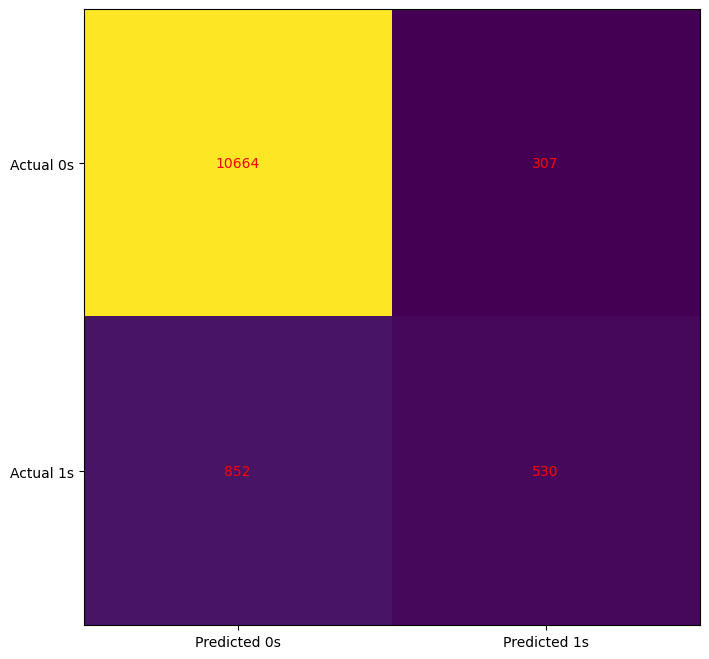

In [45]:
# Membuat Confusion Matrix untuk Logistic Regression
logistic_regression_cm = confusion_matrix(y_test, y_pred_lr)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(logistic_regression_cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, logistic_regression_cm[i, j], ha='center', va='center', color='red')
plt.show()

#### KNearest-Neighbor

In [49]:
# Menampilkan Akurasi KNearest-Neighbor
print('Akurasi untuk KNearest-Neighbor:', knn_accuracy)

Akurasi untuk KNearest-Neighbor: 0.8999433336031734


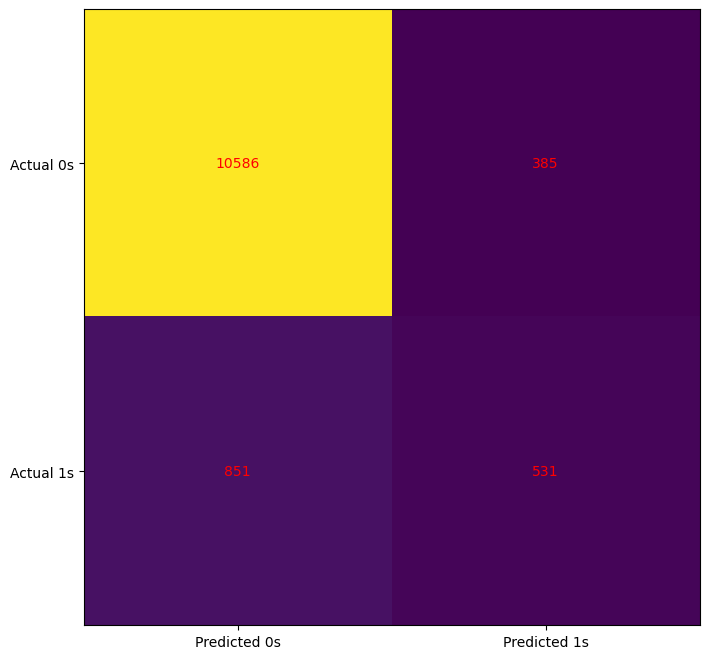

In [52]:
# Membuat Confusion Matrix untuk KNearest-Neighbor
knn_cm = confusion_matrix(y_test, y_pred_knn)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(logistic_regression_cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, logistic_regression_cm[i, j], ha='center', va='center', color='red')
plt.show()

#### SVM

In [51]:
# Menampilkan Akurasi KNearest-Neighbor
print('Akurasi untuk KNearest-Neighbor:', svm_accuracy)

Akurasi untuk KNearest-Neighbor: 0.903667125394641


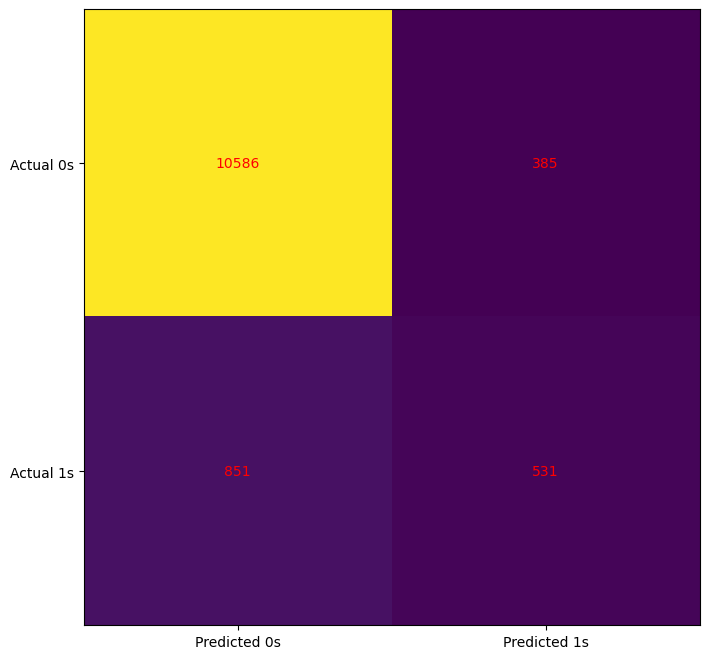

In [56]:
# Membuat Confusion Matrix untuk KNearest-Neighbor
svm_cm = confusion_matrix(y_test, y_pred_dt)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(logistic_regression_cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, logistic_regression_cm[i, j], ha='center', va='center', color='red')
plt.show()

#### Decision Tree

In [47]:
# Menampilkan Akurasi Decision Tree
print('Akurasi untuk Decision Tree:', dt_accuracy)

Akurasi untuk Decision Tree: 0.8873957743058366


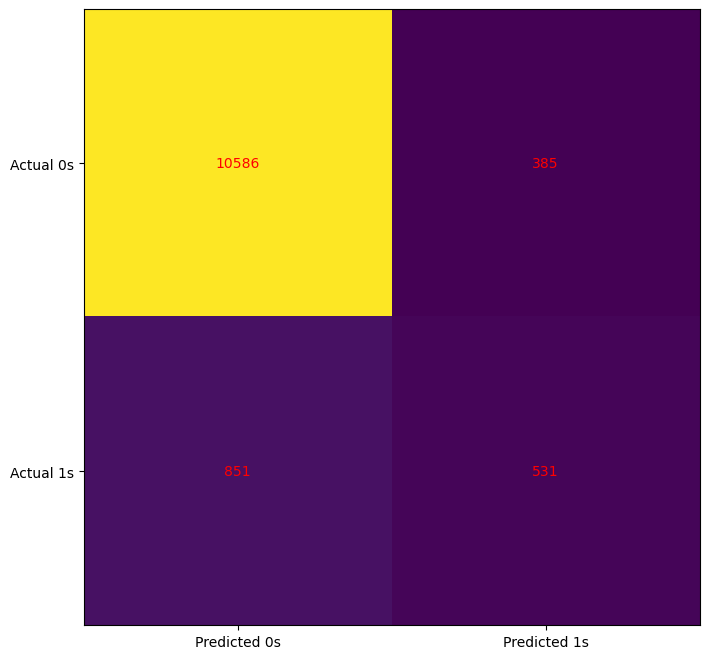

In [53]:
# Membuat Confusion Matrix untuk Decision Tree
dt_cm = confusion_matrix(y_test, y_pred_dt)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(logistic_regression_cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, logistic_regression_cm[i, j], ha='center', va='center', color='red')
plt.show()

#### Random Forest

In [55]:
# Menampilkan Akurasi Random Forest
print('Akurasi untuk Decision Tree:', rf_accuracy)

Akurasi untuk Decision Tree: 0.8873957743058366


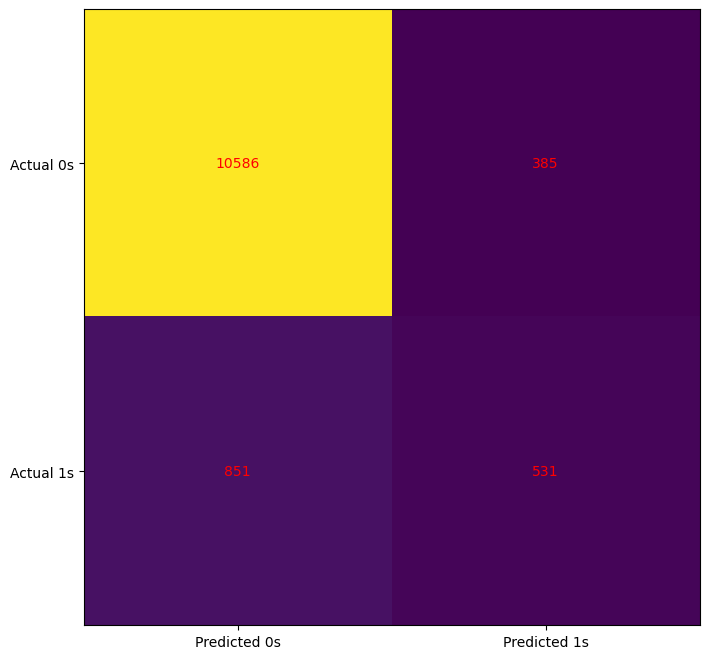

In [57]:
# Membuat Confusion Matrix untuk Random Forest
rf_cm = confusion_matrix(y_test, y_pred_rf)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(logistic_regression_cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, logistic_regression_cm[i, j], ha='center', va='center', color='red')
plt.show()

#### Naive Bayes

In [59]:
# Menampilkan Akurasi Naive Bayes
print('Akurasi untuk Decision Tree:', nb_accuracy)

Akurasi untuk Decision Tree: 0.8873957743058366


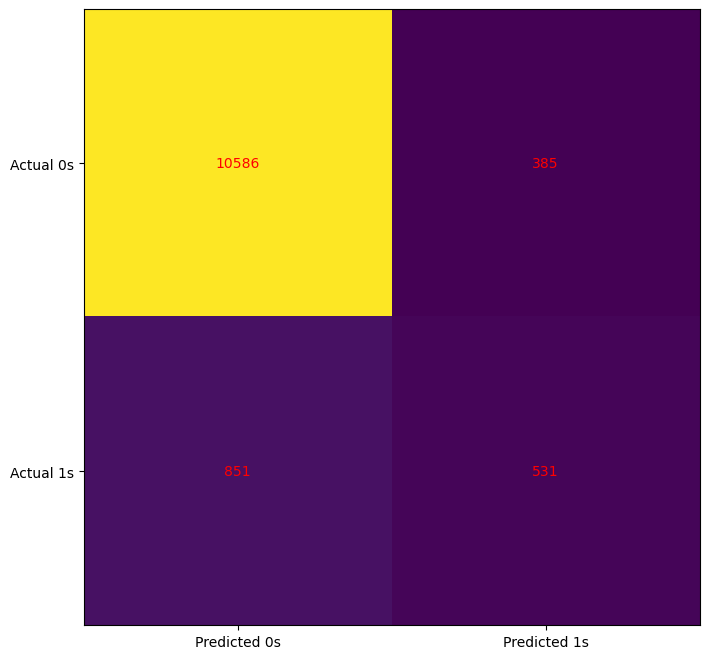

In [60]:
# Membuat Confusion Matrix untuk Naive Bayes
nb_cm = confusion_matrix(y_test, y_pred_nb)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(logistic_regression_cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, logistic_regression_cm[i, j], ha='center', va='center', color='red')
plt.show()

# Conclusion

In [61]:
print('Akurasi untuk Logistic Regression:', lr_accuracy)
print('Akurasi untuk KNearest-Neighbor:', knn_accuracy)
print('Akurasi untuk SVM:', svm_accuracy)
print('Akurasi untuk Decision Tree:', dt_accuracy)
print('Akurasi untuk Random Forest:', rf_accuracy)
print('Akurasi untuk Naive Bayes:', nb_accuracy)

Akurasi untuk Logistic Regression: 0.9061766372541084
Akurasi untuk KNearest-Neighbor: 0.8999433336031734
Akurasi untuk SVM: 0.903667125394641
Akurasi untuk Decision Tree: 0.8873957743058366
Akurasi untuk Random Forest: 0.8873957743058366
Akurasi untuk Naive Bayes: 0.8873957743058366


Berdasarkan hasil analisis di atas. Prediksi berlangganan tidaknya nasabah pada dataset perbankan ini cocok diproses oleh algoritma machine learning Logistic Regression.